VINEETH NARAYAN 191EC260

ROHAN MALLYA 191EC161

VLSI CAD ASSIGNMENT-2

FM ALGORITHM

22nd February,2022

FM Algorithm 
First we import all the required libraries for the assignment 
Matplotlib is used to draw various structures, and graphviz is used to make binary tree.


In [51]:
import numpy as np      
import math
import matplotlib.pyplot as plt
import graphviz
import datetime

In [52]:
alternate=0
start_h=0

Assignment Steps

Steps:
1)Read the inputs along with the adjacency matrix

2)Develop a function to divide optimally into two parts with minimum cutsize ( FM algorithm)

3) Run a depth first search Recursion, to partition the blocks optimally, till single block present in each partition.

4) Print the outputs, in a presentable and understandable manner.

We define functions to remove unnecessasry characters like space and flower brackets from the input text file. 

In [53]:
def remove(string):
    return string.replace(" ", "")
def remove_end2(string):
    return string.replace("}", "")

1)Format of the input file : Input array on the first line and the Adjacency matrix starts from the 2nd line

In [54]:
#Please enter the input textfile directory below
input_file_path='/content/input.txt'          #Input file is present in the shown directory which is open and read 
f = open(input_file_path, 'r+')
Lines = f.readlines()
my_file_data = Lines[0]
f.close()
#Removing spaces and brackets from text file
my_file_data=remove(my_file_data)
n=my_file_data[1]
my_file_data=my_file_data.replace("\n", "")
my_file_data=my_file_data[2:]
my_file_data=remove_end2(my_file_data)
array=my_file_data.split(",{")
array1=[]
list1=[]
#Splitting the x and y coordinates and appending them into lists 
array=array[1:]
for p in array:
  str1=p.split(",")
  list1.append( [int(str1[0]),int(str1[1])] )
input=list1
Lines=Lines[1:]
adj_mat=[]
for line in Lines:
  line=line.replace("{","")
  line=line.replace("}","")
  line=line.replace("\n","")
  line=line.replace(" ","")
  temp=[]
  for char in line:
   temp.append(int(char))
  adj_mat.append(temp)

In [55]:
input

[[10, 5], [8, 6], [4, 13], [10, 3], [8, 4], [4, 1]]

In [56]:
adj_mat                          

[[0, 1, 3, 2, 4, 2],
 [1, 0, 3, 1, 2, 1],
 [3, 3, 0, 1, 1, 2],
 [2, 1, 1, 0, 2, 3],
 [4, 2, 1, 2, 0, 1],
 [2, 1, 2, 3, 1, 0]]

Function to return set of indices of certain points  from the input array 

In [57]:
def give_index(array):
  temp=[]
  for obj in array:
     t=input.index(obj)
     temp.append(t)
  return temp

The FM algorithm we have divided into the following functions

1)Initialising into random partitions and gain buckets with apprropriate data structures.

2) Moving a block as per the gain bucket(Whichever has maximum gain and is legal to be moved as per area constraints and being unlocked).

3) Storing the cutsize/cost function in a stack.

3) Updating the gain buckets and repeating the process till all blocks are locked.

4) Finding the best configuration with least cost/cutsize



1)Initialising phase:

We take the input which is to be optimally partitioned into two parts.
First in function Init 
We randomly first assign blocks into part one and part two.



In [58]:
def init(inp):  
  
  part1=[]
  part2=[] 
  N=len(inp)
  for i in range(N):
   if(i<N/2):
     part1.append(inp[i])
   else:
     part2.append(inp[i])
  initial_rt=[]
  initial_lt=[]  

 #scores for the left partition                                  # Calculating gains in the left gain bucket
  for pair1 in part1:
   g=0                                                          # Area of block * No of edges incident is taken as gain. Edges outside the partition are positive. Edges within partition are negative.
   positive=0
   negative=0
   i=inp.index(pair1)
   for pair2 in part2:                                          #interating through all points, and through their adjacent matrices finds all the edges with weights and accumulating them.
    j=inp.index(pair2)
    positive=positive+(adj_mat[i][j]*pair2[0]*pair2[1]) 
   for pair3 in part1:
    if(pair3==pair1):
      continue
    j=inp.index(pair3)
    negative=negative+(adj_mat[i][j]*pair3[0]*pair3[1]) 
   g=positive-negative
   initial_lt.append((g,pair1,1))                              #Appending each block with its ( gain, width height,  locked/ unlocked)     unlocked = 1, locked =0

 # scores for the right partition                               #Similar process followed in right gain bucket 
  for pair1 in part2:
   g=0
   positive=0
   negative=0
   i=inp.index(pair1)
   for pair2 in part1:
    j=inp.index(pair2)
    positive=positive+(adj_mat[i][j]*pair2[0]*pair2[1])
   for pair3 in part2:
    if(pair3==pair1):
      continue
    j=inp.index(pair3)
    negative=negative+(adj_mat[i][j]*pair3[0]*pair3[1]) 
   g=positive-negative
   initial_rt.append((g,pair1,1))
  initial_lt
  lt=np.array(initial_lt)
  initial_rt
  rt=np.array(initial_rt)
  rt = rt[np.argsort(rt[:,0])]                              #Once the appending is done, we sort the gain bucket as per the gains on both buckets, so that the top of the list contains the highest gain block.
  rt=rt[::-1]
  lt=lt[np.argsort(lt[:,0])]
  lt=lt[::-1]
  lt=lt.tolist()
  rt=rt.tolist()
 
  return lt, rt

2) Moving block as per gain and constraints. 


In [59]:
def move(inp,lt,rt,min_score,alternate, log1):      #Inp is the input blocks,  lt and rt the gain buckets,  min_score is the cutsize,  alternate =Decides which gain bucket to move block from to optimize area constraints.

  for moves in range(len(inp)):               #Since no area constraints are given the problem statement, we have given constraint of maintaining equal blocks with a tolerence of one on the two sides of the partition.
    if(len(lt)==len(rt)):
      for i in range(len(lt)):                #Here we count the no of blocks on both sides of the parition and decide alternate variable accordingly.
        if(lt[i][2]==1):      
          my_point_l=lt[i]
          break
      for i in range(len(rt)):
        if(rt[i][2]==1):         
          my_point_r=rt[i]
          break 
      if(my_point_l>my_point_r):    
        alternate=0
      
      else:
        alternate=1
    
    elif(len(lt)>len(rt)):
      alternate=0
    
    else:
      alternate=1
    
    if(alternate==0):
     for i in range(len(lt)):
       if(lt[i][2]==1):
         lt[i][2]=0
         my_point=lt[i]
         break
    
     new_left_up,new_right_up=shift_update(lt,rt,my_point,alternate,inp)                  #Once movement is done, we update the points on gain buckets, through the shift_update function and then the gains in the update_gain nested function.
     
     score_up=score_function(new_left_up,new_right_up)                                    #Score_function, gives the new cost/ cutsize which is appended on the stack with coniguration.
     log1.append(( new_left_up,new_right_up,score_up,len(new_left_up)-len(new_right_up))) # appending it in the log book,  we append this configuration on a stack, to later choose the best configuration.
     
     if(score_up<min_score):
       min_score=score_up
     alternate=1
     new_left_up=np.array(new_left_up)
     new_right_up=np.array(new_right_up)                                        
     lt=new_left_up[np.argsort(new_left_up[:,0])] 
     rt=new_right_up[np.argsort(new_right_up[:,0])]
     lt=lt.tolist()
     rt=rt.tolist() 

    else: 

     for i in range(len(rt)):
       if(rt[i][2]==1):                                                               #Similarly exact same thing is repeated on the right gain bucket, if the block was moved from the right to left side of the partition.
         rt[i][2]=0
         my_point=rt[i]
         break 
    
     new_left_down,new_right_down=shift_update(lt,rt,my_point,alternate,inp)
     score_down=score_function(new_left_down,new_right_down)
     log1.append( ( new_left_down,new_right_down,score_down,len(new_left_down)-len(new_right_down) ) ) # appending it in the l
     if(score_down<min_score):
       min_score=score_down
     
     new_left_down=np.array(new_left_down)
     new_right_down=np.array(new_right_down)
     lt=new_left_down[np.argsort(new_left_down[:,0]) ] 
     rt=new_right_down[np.argsort(new_right_down[:,0])]
     lt=lt.tolist()
     rt=rt.tolist()
  return lt,rt,min_score, log1

 

3)Shift update fuction updates the gains of the gain bucket and also moves the points on the data structures based on if it was moved from left bucket or right bucket.

In [60]:
def shift_update(lt1, rt1, my_point1 ,alternate1,inp):
 # move this to the other side
 # so make new buckets new_lt and new_rt 
 
 if(alternate1==0):
   lt1.remove(my_point1)                                                        #Removing point from left bucket and adding in right 
   rt1.append(my_point1)
 else:
   rt1.remove(my_point1)
   lt1.append(my_point1)                                                          #Removing point from right bucket and adding in left
 new_lt,new_rt=update_gains(lt1,rt1,inp)
 return new_lt,new_rt

Based on the new configuration we again find the new gains.

In [61]:
def update_gains(list1 ,list2,inp):
 new_list_left=[]
 new_list_right=[]
 # for the left side
 for pair1 in list1:
  total=0
  positive=0
  negative=0
  in1=inp.index(pair1[1])
  for pair2 in list2:
   in2=inp.index(pair2[1])
   positive=positive+(adj_mat[in1][in2]*pair2[1][0]*pair2[1][1])                    #This is exactly the same way, gains were found in the initialization phase.
  for pair3 in list1:                                                               #With total gain being positive- negative.   Positive - Edges out of the partition. Negative - Edges within the partition.
   if(pair3==pair1):
      continue                                                                      #interating through all points, and through their adjacent matrices finds all the edges with weights and accumulating them.
   j=inp.index(pair3[1])
   negative=negative+(adj_mat[in1][j]*pair3[1][0]*pair3[1][1]) 
  total=positive-negative
  new_list_left.append((total,pair1[1],pair1[2]))
 # for the right side                                                               #Same procedure on the right side.
 for pair1 in list2:
  total1=0
  positive1=0
  negative1=0
  in1=inp.index(pair1[1])
  for pair2 in list1:
   in2=inp.index(pair2[1])
   positive1=positive1+(adj_mat[in1][in2]*pair2[1][0]*pair2[1][1])                  
  for pair3 in list2:
   if(pair3==pair1):
      continue
   j=inp.index(pair3[1])
   negative1=negative1+(adj_mat[in1][j]*pair3[1][0]*pair3[1][1]) 
  total1=positive1-negative1
  new_list_right.append((total1,pair1[1],pair1[2])) 
 
 #returning the lists with updated gains 
 return new_list_left,new_list_right

Finally the cost function, which finds the total cutsize of the particular partition.  
Iterating through all points and adding edges outside partition

In [62]:
def score_function(list11,list21):
  score1=0
  
  for pair11 in list11:
   in1=input.index(pair11[1])
   for pair21 in list21:
    in2=input.index(pair21[1])
    score1=score1+adj_mat[in1][in2]
  return score1  

This is a simple logging function which stores scores in a stack, which we can later use to decide the best configuration.

In [63]:
def first_log(lt1, rt1, log):
  min_score=score_function(lt1,rt1)
  
  log.append((lt1,rt1,score_function(lt1,rt1),len(lt1)-len(rt1)))
  return min_score, log

Once all points are locked.


We now choose the best configuration based on cutsize.

In [64]:
def printing(log1):
  l=[]
  r=[]
  
  min=1000
  for steps in log1:
    if(steps[2]<min):
      min=steps[2]
  for st in log1:
    if(st[2 ]==min):
      print('partition number 1 :',st[0])
      print('partition number 2 :',st[1])
      print('cutsize = ',st[2])
      l=st[0]
      r=st[1]
      break
  return l, r, log1

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

---



We now go to next step of recursion and printing outputs in presentable manner.

The below two functions weight and check are for the sole purpose of printing the weight of each partition. This is done using graphviz library. 

In the below functions we have just ensured that each node is unique, if not unique ( block already present in listing[] list), then we just append a ' ' space character to make it unique, so that the nodes in the output graph don't overlap.

In [65]:
def weight(array,k):
  sum=0
  count=0
  for i in array:
    sum=sum+i[0]*i[1]                       #Calculating weight 
  for j in range (len(listing)):
    if(sum==listing[j]):
      count=count+1                          #checking uniqueness
  if(k==1):
    listing.append(sum)
  s= str(sum)
  while(count>0):
    s=s + ' '                                #Making the node unique
    count=count-1
  return s

Similar process as above but for condition when only 2 blocks to be partitioned.

In [66]:
def check(sum,k):
  count=0
  for j in range (len(listing)):
    if(sum==listing[j]):
      count=count+1
  
  listing.append(sum)
  s= str(sum)
  while(count>0):
    s=s + ' '
    count=count-1
  return s


In [67]:
listing=[]

***MAIN RECURSION FUNCTION ***


We have also included the outputs within the same recursion function for ease and efficiency



Here we have used Depth first search to recurse thorugh till only one block is left per partition.

For printing partition boxes we have used HTML
 
For binary trees, we have use graphviz

In [68]:
dot = graphviz.Digraph('Partition Tree', comment='The Round Table')
c = graphviz.Graph(name='weights_of_partition', node_attr={'shape': 'box'})                                      #Graphviz used to plot the partition in form of binary tree.
h = graphviz.Graph('output_partition_boxes',node_attr={'shape': 'box'}) 
final=[]
apna_array=[]
def recurse(stack):
  log=[]
  global start_h
  
  inp1=stack
  lt, rt =init(inp1)  
                                                              
  min_score, log= first_log(lt,rt,log)                                             #First initialising
 
  alt=0
 
  lt,rt,min_score, log=move(inp1,lt,rt,min_score,alt,log)                            #Moving as per gain bucket, updating gains
  min=1000
  log.reverse()
  left, right, log = printing(log)                                                 #Getting the final partition. this left and right also contains, the locked, unlocked and scores.
  
  ###################################################
  apna_lt=[]                                                                         #We create apna_lt and apna_rt which contains only the points of lt and rt partitions.
  apna_rt=[]
  for apna in left:
    apna_lt.append(apna[1])
  for desi in right:
    apna_rt.append(desi[1])

    
  apna_array.append((apna_lt,apna_rt))                                              #Now with weight functions and grpahviz we plot the graphs for this particular parttion 
  area1=weight(stack,1)
  area2=weight(apna_lt,0)
  area3=weight(apna_rt,0)

  c.edge(area1,area2)
  c.edge(area1,area3)
  dot.edge(str(stack),str(apna_lt))
  dot.edge(str(stack),str(apna_rt))
  
  str1=str(give_index(apna_lt))
  str2=str(give_index(apna_rt))

  h.node( name=str(start_h),label='''<<TABLE>
   <TR>
    <TD>'''+str1+'''</TD>
    <TD>'''+str2+'''</TD>
   </TR>
   </TABLE>>''')
  start_h=start_h+1
  #Above HTML code is to graphically plot the output the partition boxes
  #TR TD are used to plot a table via new row and new data
  #####################
  final.append((left,right))
  if(len(left)!=1):                                                                   #If there is only 1 block left, theres no more partitions to be done
    if(len(left)==2):                                                                 #If there are two blocks, we dont have to run the partition, directly divide to left and right 
      final.append((left[0],left[1]))
      apna_array.append((left[0][1],left[1][1]))
      apna_array.append(left[0][1])
      apna_array.append(left[1][1])
      area1=weight(apna_lt,1)
      area2=apna_lt[0][0]*apna_lt[0][1]
      a2=check(area2,0)
      area3=apna_lt[1][0]*apna_lt[1][1]
      a3=check(area3,0)

      c.edge(area1,a2)                                                                 #Drawing edges as per the weights in the binary tree
      c.edge(area1,a3)
      dot.edge(str(apna_lt),str(apna_lt[0]))
      dot.edge(str(apna_lt),str(apna_lt[1]))
      str1=str(input.index(apna_lt[0]))
      str2=str(input.index(apna_lt[1]))
      h.node( name=str(start_h), label='''<<TABLE>
        <TR>
          <TD>'''+str1+'''</TD>
          <TD>'''+str2+'''</TD>
        </TR>
        </TABLE>>''')
      start_h=start_h+1
      p1=input.index(apna_lt[0])
      p2=input.index(apna_lt[1])
      print('partition number 1 :',apna_lt[0])
      print('partition number 2 :',apna_lt[1])
      print('cutsize = ',adj_mat[p1][p2])
      print('direct partition only 2 blocks present this side')
    else:
      stack=[]                                                                          #IF THERE ARE MORE THAN TWO BLOCKS, WE TAKE COORDINATES FROM LEFT PARTITION BY APPENDING THE ABOVE PARTITION SINCE IT IS A DEPTH FIRST SEARCH RECURSION
      log=[]
      k= len(left)
      for i in range(k):
       stack.append(left[i][1])
      recurse(stack)
  else:
    final.append((left))
    apna_array.append(left[0][1])
    print(apna_rt)
    print('one block present here only, no more partitions')
  if(len(right)!=1):                                                                 #Similary to left side, right side run.
    if(len(right)==2):
      final.append((right[0],right[1]))
      apna_array.append((right[0][1],right[1][1]))
      apna_array.append(right[0][1])
      apna_array.append(right[1][1])
      area1=weight(apna_rt,1)
      area2=apna_rt[0][0]*apna_rt[0][1]
      a2=check(area2,0)
      area3=apna_rt[1][0]*apna_rt[1][1]
      a3=check(area3,0)

      c.edge(area1,a2)
      c.edge(area1,a3)
      dot.edge(str(apna_rt),str(apna_rt[0]))
      dot.edge(str(apna_rt),str(apna_rt[1]))

      str1=str(input.index(apna_rt[0]))
      str2=str(input.index(apna_rt[1]))
      h.node( name=str(start_h),label='''<<TABLE>
        <TR>
          <TD>'''+str1+'''</TD>
          <TD>'''+str2+'''</TD>
        </TR>
        </TABLE>>''')
      #The above is the HTML code but for the case where we have only 2 blocks to be partitioned.
      start_h=start_h+1
      p1=input.index(apna_rt[0])
      p2=input.index(apna_rt[1])
      print('partition number 1 :',apna_rt[0])
      print('partition number 2 :',apna_rt[1])
      print('cutsize = ',adj_mat[p1][p2])
      print('direct partition only 2 blocks present this side')
    else:
      stack=[]
      log=[]
      l= len(right)
      for i in range(l):
        stack.append(right[i][1])
      recurse(stack)
  else:
    final.append((right))
    apna_array.append(right[0][1])
    print(apna_rt)
    print('one block present here only, no more partitions')
    


In [69]:
stack=[]
stack=input
recurse(stack)

partition number 1 : [(-264, [10, 5], 1), (-236, [8, 6], 1), (-288, [4, 13], 1), (-284, [8, 4], 0)]
partition number 2 : [(194, [4, 1], 1), (252, [10, 3], 1)]
cutsize =  12
partition number 1 : [(-172, [10, 5], 1), (-38, [4, 13], 0), (-104, [8, 4], 0)]
partition number 2 : [(238, [8, 6], 0)]
cutsize =  6
partition number 1 : [(-44, [10, 5], 1), (6, [8, 4], 0)]
partition number 2 : [(146, [4, 13], 0)]
cutsize =  4
partition number 1 : [10, 5]
partition number 2 : [8, 4]
cutsize =  4
direct partition only 2 blocks present this side
[[4, 13]]
one block present here only, no more partitions
[[8, 6]]
one block present here only, no more partitions
partition number 1 : [4, 1]
partition number 2 : [10, 3]
cutsize =  3
direct partition only 2 blocks present this side


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/lo

 PARTITIONS REPRESENTATION


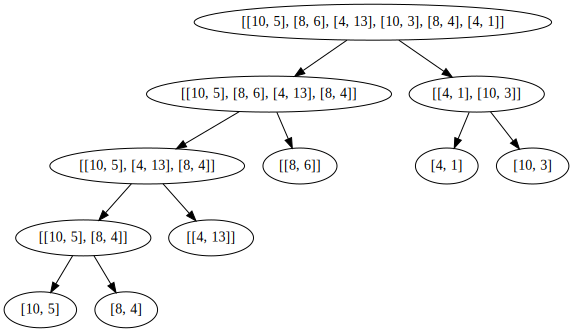

In [70]:
print(' PARTITIONS REPRESENTATION')
dot

 WEIGHTS :AREAS OF INIDIVIDUAL PARTITIONS


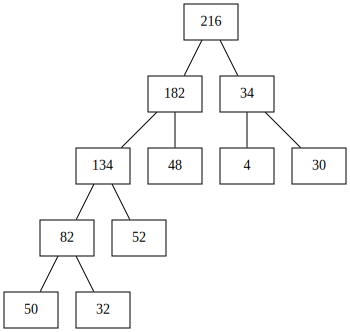

In [71]:
print(' WEIGHTS :AREAS OF INIDIVIDUAL PARTITIONS')
c

Output partition boxes

Below we have represented the partition in block form which follows Depth first search format.

Here each number represents the index of the points with respect to the input array.

These indices are getting partitioned in every recursion cycle.

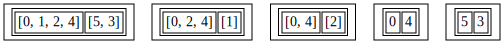

In [72]:
h

***One may find all the relevant outputs in the folder named "output_folder" ***.

1)Partition_tree.gv.svg has the visual representation of the partition tree.

2)output_partition_boxes.gv.svg has visual representation of partition in form of rectangular partitions.

3)weights_of_partition.gv.svg has the weights of all the partitions in a graphical form which corresponds to the partition tree

In [73]:
dot.format = 'dot'
dot.render(directory='/content/output_folder')
dot.format ='svg'
dot.render(directory='/content/output_folder')
c.format='svg'
c.render(directory='/content/output_folder')
h.format='svg'
h.render(directory='/content/output_folder')

'/content/output_folder/output_partition_boxes.gv.svg'

***One may find all the relevant outputs in the folder named "output_folder" .***